In [ ]:
Samhitha Medulla - 700751257

1. Follow the instruction below and then report how the performance changed.(apply all at once)
• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Flatten layer.
• Dropout layer at 20%.
• Fully connected layer with 1024 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected layer with 512 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected output layer with 10 units and a Softmax activation function
Did the performance change?


In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Fix random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One hot encode outputs
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
num_classes = test_labels.shape[1]

# Create the model
cnn_model = Sequential()

# Layer 1: Conv2D with 32 filters, 3x3 size, ReLU activation, and Dropout of 20% (Only first layer has input_shape)
cnn_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Dropout(0.2))

# Layer 2: Conv2D with 32 filters, 3x3 size, ReLU activation, MaxPooling of 2x2
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Conv2D with 64 filters, 3x3 size, ReLU activation, and Dropout of 20%
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(Dropout(0.2))

# Layer 4: Conv2D with 64 filters, 3x3 size, ReLU activation, MaxPooling of 2x2
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Conv2D with 128 filters, 3x3 size, ReLU activation, and Dropout of 20%
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(Dropout(0.2))

# Layer 6: Conv2D with 128 filters, 3x3 size, ReLU activation, MaxPooling of 2x2
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
cnn_model.add(Flatten())

# Layer 7: Fully connected layer with 1024 units, ReLU activation, and Dropout of 20%
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.2))

# Layer 8: Fully connected layer with 512 units, ReLU activation, and Dropout of 20%
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.2))

# Layer 9: Fully connected output layer with 10 units and Softmax activation
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
num_epochs = 5
learning_rate = 0.01
optimizer_sgd = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=False)
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer_sgd, metrics=['accuracy'])

# Print model summary
print(cnn_model.summary())

# Fit the model
cnn_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=num_epochs, batch_size=32)

# Evaluate the model
model_scores = cnn_model.evaluate(test_images, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (model_scores[1] * 100))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 478s 304ms/step - accuracy: 0.2388 - loss: 2.0397 - val_accuracy: 0.4711 - val_loss: 1.4847
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 465s 281ms/step - accuracy: 0.4745 - loss: 1.4445 - val_accuracy: 0.5481 - val_loss: 1.2498
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 465s 296ms/step - accuracy: 0.5729 - loss: 1.2030 - val_accuracy: 0.5718 - val_loss: 1.1997
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 455s 291ms/step - accuracy: 0.6404 - loss: 1.0181 - val_accuracy: 0.6737 - val_loss: 0.9345
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 487s 281ms/step - accuracy: 0.6912 - loss: 0.8730 - val_accuracy: 0.6959 - val_loss: 0.8611
Accuracy: 69.59%


Import required libraries like NumPy for math operations and Keras for building the model.

Load the CIFAR-10 dataset, which contains 60,000 images in 10 categories.

Normalize the images by converting pixel values from 0-255 to 0-1 for better training.

Convert labels to a suitable format using one-hot encoding so the model can understand them.

Create a CNN model with multiple layers to process and recognize image patterns.

Use Conv2D layers to detect image features like edges, shapes, and colors.

Use MaxPooling layers to reduce the image size while keeping important information.

Flatten the data and add Dense (fully connected) layers to make predictions.

Compile and train the model using an optimizer (SGD) to improve accuracy.

Test the model on unseen images and print the final accuracy percentage.

2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.

In [5]:
import numpy as np

# Predict the first 4 images
predicted_outputs = cnn_model.predict(test_images[:4])

# Convert predictions from one-hot encoded format to label format (argmax to get the index of max value)
predicted_labels = np.argmax(predicted_outputs, axis=1)

# Get the actual labels of the first 4 images (also converting one-hot encoded labels to their actual class)
actual_labels = np.argmax(test_labels[:4], axis=1)

# Display the results
for index in range(4):
    print(f"Image {index+1}:")
    print(f"Predicted Class: {predicted_labels[index]}")
    print(f"Actual Class: {actual_labels[index]}")
    print("Correct Prediction!" if predicted_labels[index] == actual_labels[index] else "Incorrect Prediction.")
    print("-" * 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Image 1:
Predicted Class: 5
Actual Class: 3
Incorrect Prediction.
------------------------------
Image 2:
Predicted Class: 8
Actual Class: 8
Correct Prediction!
------------------------------
Image 3:
Predicted Class: 0
Actual Class: 8
Incorrect Prediction.
------------------------------
Image 4:
Predicted Class: 0
Actual Class: 0
Correct Prediction!
------------------------------


Import NumPy for handling numerical operations.

Use the trained model to predict the first 4 test images by passing them to cnn_model.predict().

Extract the predicted class labels using np.argmax(), which selects the class with the highest probability.

Extract the actual class labels from test_labels using np.argmax(), since labels are one-hot encoded.

Loop through the first 4 images using a for loop to compare predicted and actual labels.

Print the image number to indicate which test image is being checked.

Display the predicted class from the model’s output.

Display the actual class from the dataset.

Check if the prediction is correct and print "Correct Prediction!" if it matches the actual label.

Print a separator ("-" * 30) to keep the output organized and easy to read.

3. Visualize Loss and Accuracy using the history object

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 332s 212ms/step - accuracy: 0.2764 - loss: 1.9664 - val_accuracy: 0.4713 - val_loss: 1.4853
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 394s 219ms/step - accuracy: 0.4965 - loss: 1.3875 - val_accuracy: 0.5840 - val_loss: 1.1736
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 383s 220ms/step - accuracy: 0.5812 - loss: 1.1731 - val_accuracy: 0.6217 - val_loss: 1.0690
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 378s 217ms/step - accuracy: 0.6333 - loss: 1.0299 - val_accuracy: 0.6726 - val_loss: 0.9362
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 363s 205ms/step - accuracy: 0.6735 - loss: 0.9180 - val_accuracy: 0.6958 - val_loss: 0.8825
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 334s 214ms/step - accuracy: 0.7088 - loss: 0.8291 - val_accuracy: 0.7093 - val_loss: 0.8395
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 374s 209ms/step - accuracy: 0.7290 - loss: 0.7713 - val_accuracy: 0.7181 - val_loss: 0.8221
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 379s 207ms/step - ac

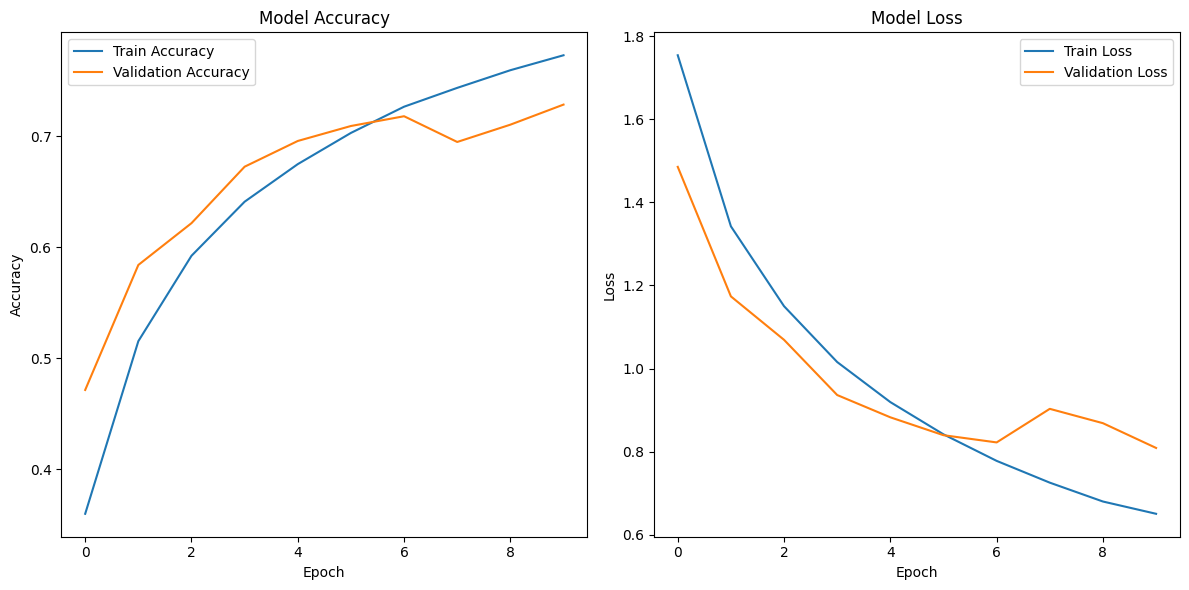

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import cifar10

# Fix random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255.0
test_images /= 255.0

# One hot encode outputs
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
num_classes = test_labels.shape[1]

# Create the model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
num_epochs = 10
learning_rate = 0.01
decay_rate = learning_rate / num_epochs
optimizer_sgd = SGD(learning_rate=learning_rate, momentum=0.9)
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer_sgd, metrics=['accuracy'])

# Train the model and capture the history
training_history = cnn_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=num_epochs, batch_size=32)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
